In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
import os
import numpy as np

# Add the project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

import dagology as dag

np.random.seed(42)

In [2]:
%matplotlib inline

In [3]:
N = 20
D = 2
R = dag.minkowski_interval(N, D)

In [4]:
G = dag.CausalSetGraph().generate_graph(R, weighted=True)
G_TR = nx.transitive_reduction(G)

In [5]:
pos = {i:G.nodes[i]['position'][::-1] for i in G.nodes()}
labels = {i: f"{i}\n\n" + ", ".join(f"{t:.3f}" for t in G.nodes[i]['position']) for i in range(N)}

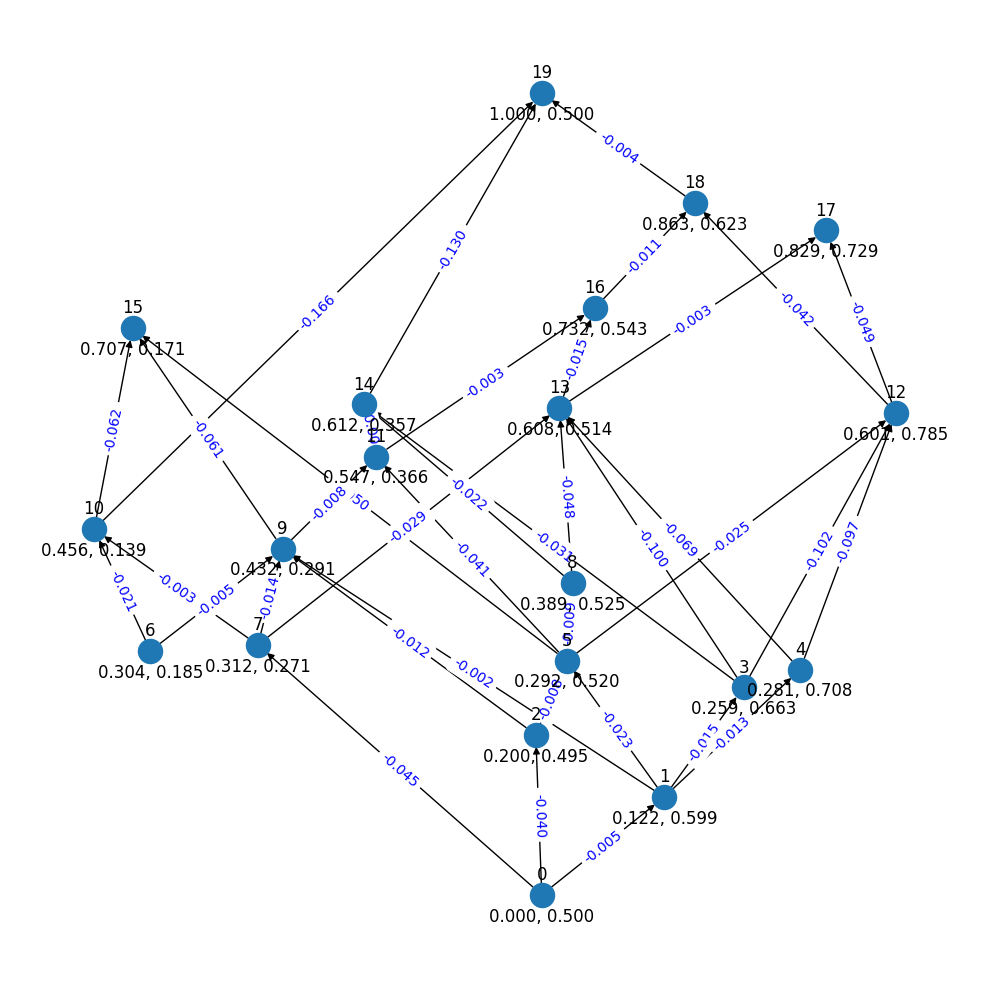

In [6]:
plt.figure(figsize=(10,10))

nx.draw_networkx_labels(G,pos,labels, font_color='black')
nx.draw(G_TR, pos=pos)
edge_labels = {i:f"{nx.get_edge_attributes(G,'weight')[i]: .3f}" for i in G_TR.edges}
nx.draw_networkx_edge_labels(G_TR, pos, edge_labels=edge_labels, font_color='blue')

plt.axis('off')
plt.tight_layout()
plt.show()